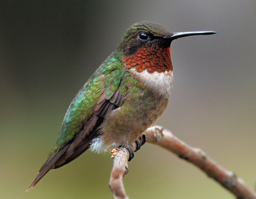

In [3]:
from fastbook import *

urls = search_images_ddg('bird photos', max_images=1) #search duckduckgo
len(urls),urls[0]

dest = Path('bird.jpg')
if not dest.exists(): download_url(urls, dest)
im = Image.open(dest)
im.to_thumb(256,256)

In [6]:
searches = 'forest','bird' #download forest and bird images
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images_ddg(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images_ddg(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [7]:
failed = verify_images(get_image_files(path)) 
failed.map(Path.unlink) #remove broken links

(#47) [None,None,None,None,None,None,None,None,None,None...]

C:\Users\Vishal Chavan\anaconda3\envs\uob\Lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


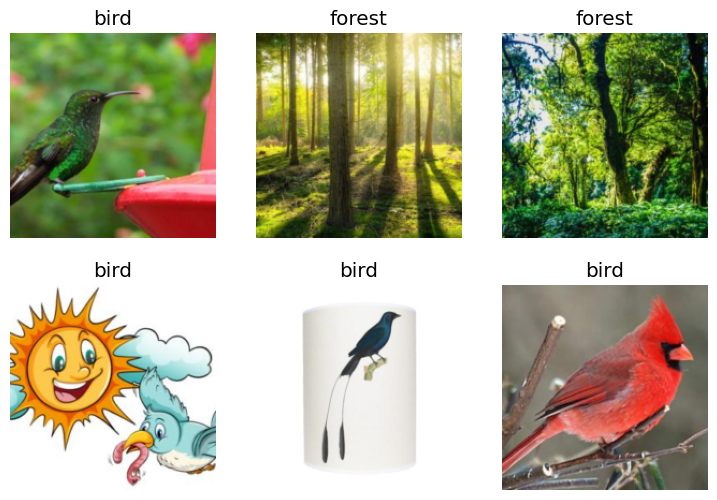

In [8]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squash')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [9]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

C:\Users\Vishal Chavan\anaconda3\envs\uob\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Vishal Chavan/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:09<00:00, 5.02MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.468361,0.193327,0.050459,01:17


epoch,train_loss,valid_loss,error_rate,time
0,0.140136,0.164265,0.041284,01:32
1,0.107507,0.191745,0.050459,01:27
2,0.070479,0.183543,0.045872,01:32


In [15]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probabi1ity it's a bird: {probs[0]:.4f}")

This is a: bird.
Probabi1ity it's a bird: 1.0000
